<a href="https://colab.research.google.com/github/prateeksab/housingprices/blob/main/Models_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/prateeksab/housingprices.git
%cd housingprices/Data
%ls

Cloning into 'housingprices'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 93 (delta 47), reused 22 (delta 7), pack-reused 0
Unpacking objects: 100% (93/93), done.
/content/housingprices/Data
Ames_data_8_4_21.csv           AmesHousing_update.csv
Ames_data_8_8_ps.csv           data_description.txt
AmesDummyData_8_4_21.csv       sample_submission.csv
AmesDummyData.csv              test.csv
Ames_dummy_UPDATE_8_10_21.csv  train.csv
AmesHousing.csv                updated_Ames_FE_8_10_21.csv


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style='ticks', palette='Set2')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [168]:
df = pd.read_csv('updated_Ames_FE_8_10_21.csv', index_col=0)
df['remodeled'] = df['remodeled'].astype(int)

In [169]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Total Bsmt SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'SalePrice', 'remodeled', 'Age', 'RemodelAge', 'total_other_rooms',
       'outdoorspace', 'reg_lot_shp', 'leveled_land', 'culdsac', '1fam_hm',
       'unf_attic', 'hip_roof', 'premium_ext', 'exclnt_extr',
       'cblock_foundation', 'pconc_foundation', 'other_foundation',
       'exclnt_bsmt', 'bsmt_exosure', 'bsmt_finished', 'bsmt_rec',
       'excellent_heating', 'central_AC', 'kitchen_exclnt', 'fireplace_exclnt',
       'attached_garage', 'finsihed_garage', 'pave_drive', 'normal_sale',
       'vnr_brk'],
      dtype='object')

In [315]:
df['Log_SalePrice'] = np.log(df['SalePrice'])
target = 'Log_SalePrice'
remove_features = ['Log_SalePrice','SalePrice','Neighborhood','other_foundation','Overall Qual','Overall Cond','RemodelAge','cblock_foundation','pconc_foundation']
features = []
# for i in df.columns:
#   if i!='SalePrice':
#     if i!= 'Log_SalePrice':
#       if i!='Neighborhood':
#         features.append(i)

for i in df.columns:
  if i not in remove_features:
    features.append(i)

#features = ['Age','Overall Qual','Lot Frontage','remodeled']
# Selected features are features which were selected post the test of multicollinearity. Features which failed the VIF test were removed
selected_features = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled',
                      'outdoorspace','reg_lot_shp','culdsac','1fam_hm','unf_attic','hip_roof','premium_ext','exclnt_extr',
                     'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage',
                     'finsihed_garage','normal_sale','vnr_brk']
features = selected_features
#features

In [316]:
# assigning X & Y to features and target
X = df[features]
Y = df[target]

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [317]:
# Linear regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X=X_train,y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
# Cross validation
scores = cross_val_score(linear_regression_model, X_train, Y_train,  cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.729 +/- 0.042


In [319]:
Y_Pred = linear_regression_model.predict(X_test)

In [320]:
np.mean((Y_Pred - Y_test)**2)

0.05215464446252404

In [321]:
mean_squared_error(y_true = Y_test,y_pred=Y_Pred)

0.05215464446252403

In [322]:
# Using stats models
sm_model = sm.OLS(endog=Y_train,exog=X_train.astype(float)).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Log_SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2107.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:51:10   Log-Likelihood:                         -4875.9
No. Observations:                2197   AIC:                                      9810.
Df Residuals:                    2168   BIC:                                      9975.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Lot Frontage          0.0168      0.002     10.367      0.000       0.014       0.020
Lot Area           4.776e-05   6.71e-06      7.116      0.000    3.46e-05    6.09e-05
Mas Vnr Area         -0.0002      0.000     -0.393      0.694      -0.001       0.001
BsmtFin SF 1          0.0003      0.000      1.938      0.053   -3.99e-06       0.001
BsmtFin SF 2          0.0004      0.000      1.227      0.220      -0.000       0.001
Low Qual Fin SF       0.0021      0.001      1.943      0.052   -1.89e-05       0.004
Bsmt Full Bath        0.2517      0.127      1.982      0.048       0.003       0.501
Half Bath             0.4841      0.104      4.639      0.000       0.279       0.689
Fireplaces           -0.2365      0.099     -2.392      0.017      -0.430      -0.043
remodeled             0.8679      0.106      8.200      0.000       0.660       1.076
outdoorspace          2.0075      0.134     15.017      0.000       1.745       2.270
reg_lot_shp           2.0273      0.106     19.161      0.000       1.820       2.235
culdsac               1.1479      0.213      5.401      0.000       0.731       1.565
1fam_hm               2.2390      0.135     16.543      0.000       1.974       2.504
unf_attic             0.6557      0.421      1.557      0.120      -0.170       1.481
hip_roof              0.2882      0.133      2.166      0.030       0.027       0.549
premium_ext           0.4422      0.122      3.623      0.000       0.203       0.681
exclnt_extr           0.0646      0.167      0.387      0.699      -0.263       0.393
exclnt_bsmt           1.0103      0.144      6.995      0.000       0.727       1.294
bsmt_exosure          0.2223      0.130      1.710      0.087      -0.033       0.477
bsmt_finished         0.5844      0.138      4.247      0.000       0.315       0.854
bsmt_rec              0.8687      0.176      4.935      0.000       0.524       1.214
excellent_heating     0.6389      0.121      5.277      0.000       0.401       0.876
kitchen_exclnt       -0.2698      0.149     -1.816      0.069      -0.561       0.022
fireplace_exclnt      0.2476      0.138      1.795      0.073      -0.023       0.518
attached_garage       1.1091      0.143      7.731      0.000       0.828       1.390
finsihed_garage      -0.3583      0.143     -2.500      0.012      -0.639      -0.077
normal_sale           2.8365      0.115     24.697      0.000       2.611       3.062
vnr_brk               0.4095      0.136      3.015      0.003       0.143       0.676
==============================================================================
Omnibus:                       78.241   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88

# New Section

In [290]:
in_sample_r2 = linear_regression_model.score(X=X_train,y=Y_train)
print("In Sample R2: %0.3f" % (in_sample_r2))
out_of_sample_r2 = linear_regression_model.score(X=X_test,y=Y_test)
print("Out Of Sample R2: %0.3f" % out_of_sample_r2)

In Sample R2: 0.739
Out Of Sample R2: 0.665


In [291]:
# Calculating residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

in_sample_residuals = calculate_residuals(linear_regression_model,X_train,Y_train)
out_sample_residuals = calculate_residuals(linear_regression_model,X_test,Y_test)


# Testing assumptions

# Linearity


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


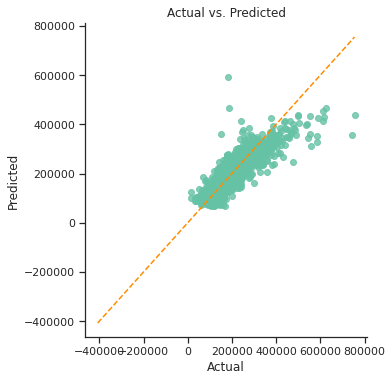

None
Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


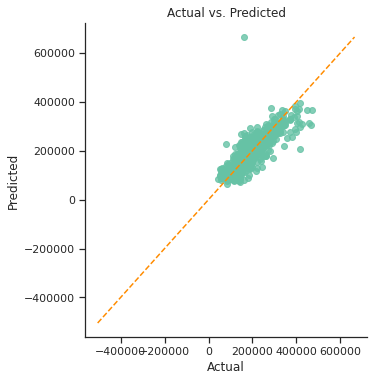

None


In [292]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=5)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

in_sample_linearity = linear_assumption(linear_regression_model,X_train,Y_train)
print(in_sample_linearity)
out_sample_linearity = linear_assumption(linear_regression_model,X_test,Y_test)
print(out_sample_linearity)

# Testing Normality of residuals

In [293]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')



Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


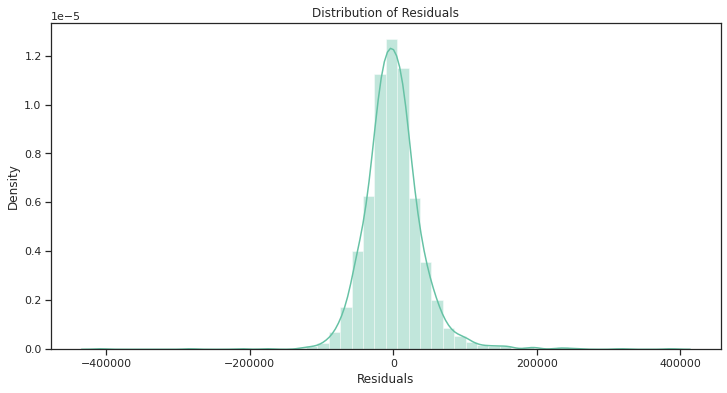


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.963358172228826e-22
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


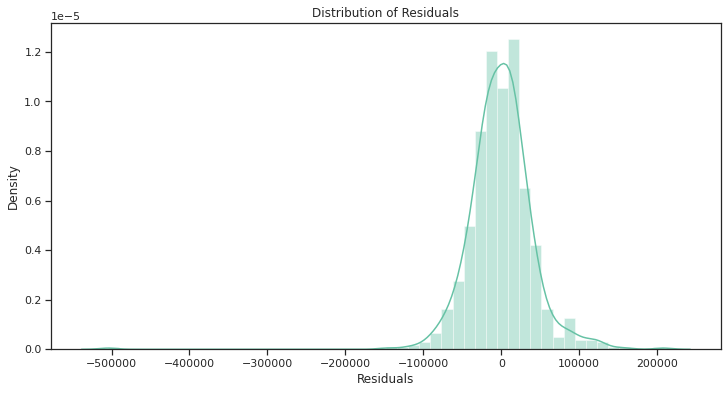


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [294]:
in_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_train,Y_train)
out_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_test,Y_test)

# Multicollinearity assumption

In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (40,40))
    feature_names = features.columns
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


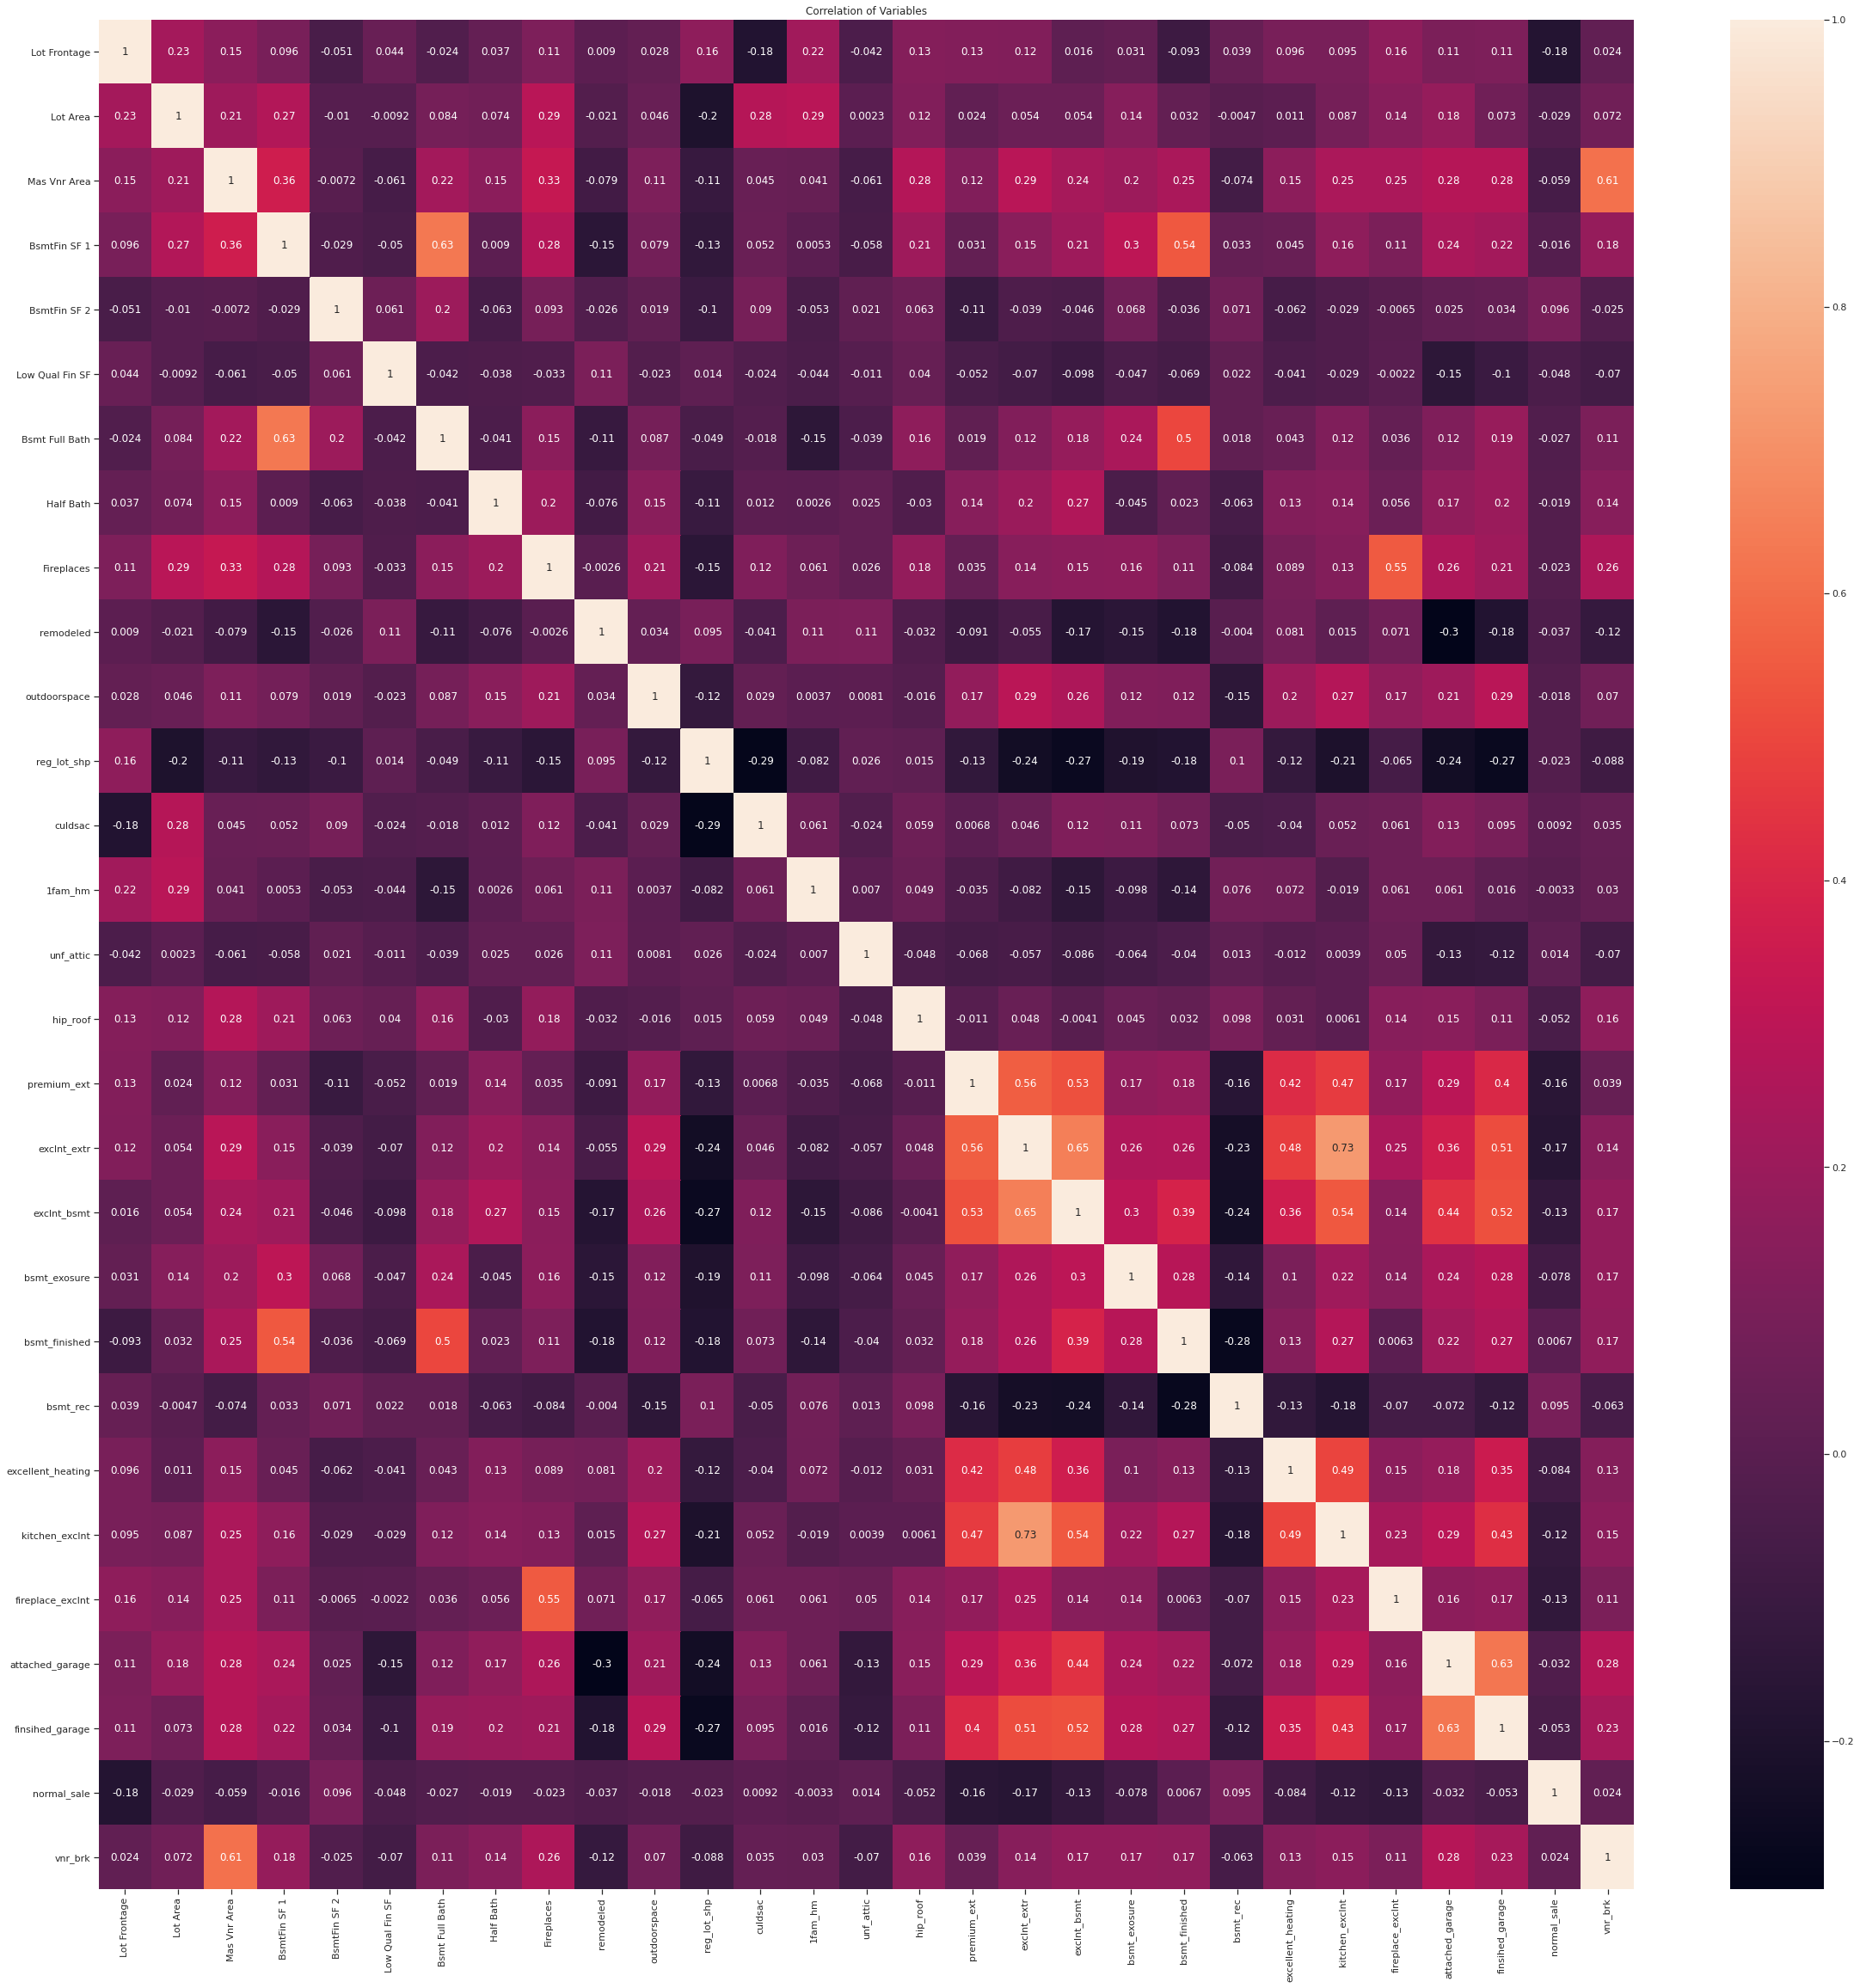

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Lot Frontage: 5.198420437805204
Lot Area: 5.324973772632967
Mas Vnr Area: 2.720886443745174
BsmtFin SF 1: 4.589272904135811
BsmtFin SF 2: 1.29937793954573
Low Qual Fin SF: 1.0592810614278998
Bsmt Full Bath: 3.557467266822189
Half Bath: 1.8697458313203899
Fireplaces: 3.3832310113843556
remodeled: 2.216385027125092
outdoorspace: 6.959197314768364
reg_lot_shp: 3.0284867960816566
culdsac: 1.3240084593340224
1fam_hm: 7.393783422844601
unf_attic: 1.0610364690643799
hip_roof: 1.4345091984091907
premium_ext: 3.1339071391873476
exclnt_extr: 5.134394581736047
exclnt_bsmt: 5.052870629384096
bsmt_exosure: 1.7693631317865846
bsmt_finished: 3.530407183146939
bsmt_rec: 1.346577427551049
excellent_heating: 4.640990998159814
kitchen_exclnt: 4.660115334732315
fireplace_exclnt: 2.298496036662383
attached_garage: 6.30636793360

In [306]:
in_sample_multicollinearity = multicollinearity_assumption(linear_regression_model,X_test,Y_test)

In [ ]:
X_train.values

In [302]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x

[4.844120653480852,
 2.9043497254432293,
 2.5475628916526323,
 5.357825465524201,
 1.2660355771392184,
 1.0436935020621143,
 3.2762039995789567,
 1.9149808389933136,
 3.3274016756969917,
 2.288739192435251,
 6.425145709663066,
 3.1385969740749693,
 1.2646431580965158,
 6.3858792330743155,
 1.0634345767538649,
 1.4939457002206167,
 2.5935434425491946,
 4.344313965601299,
 4.622784900197866,
 1.777613361607005,
 3.8865284275541385,
 1.3657564028413811,
 4.3145776748529014,
 4.3195767225250234,
 2.180182364211735,
 6.0056261809541756,
 4.675669208563345,
 4.858184975988491,
 2.5172061514998867]

In [301]:
vif_data['Acceptable'] = vif_data['VIF'].apply(lambda x: 1 if x<10 else 0)
vif_data.sort_values(by='Acceptable',ascending=True)
features_to_remove = vif_data[vif_data['Acceptable'] == 0]['feature']
features_to_remove.values
vif_data

,feature,VIF,Acceptable
0,Lot Frontage,4.844121,1
1,Lot Area,2.904350,1
2,Mas Vnr Area,2.547563,1
3,BsmtFin SF 1,5.357825,1
4,BsmtFin SF 2,1.266036,1
5,Low Qual Fin SF,1.043694,1
6,Bsmt Full Bath,3.276204,1
7,Half Bath,1.914981,1
8,Fireplaces,3.327402,1
9,remodeled,2.288739,1


In [242]:
# new_features were posted as selected_features
new_features = features
for element in features_to_remove:
  if element in new_features:
    new_features.remove(element)
new_features

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Half Bath',
 'Fireplaces',
 'remodeled',
 'RemodelAge',
 'outdoorspace',
 'reg_lot_shp',
 'culdsac',
 '1fam_hm',
 'unf_attic',
 'hip_roof',
 'premium_ext',
 'exclnt_extr',
 'cblock_foundation',
 'pconc_foundation',
 'exclnt_bsmt',
 'bsmt_exosure',
 'bsmt_finished',
 'bsmt_rec',
 'excellent_heating',
 'kitchen_exclnt',
 'fireplace_exclnt',
 'attached_garage',
 'finsihed_garage',
 'normal_sale',
 'vnr_brk']

In [ ]:
# Building model with new_features only
